In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Here, I read the data 
df1 = pd.read_csv("creditcard.csv")

In [4]:
# There is no missing value are there in this data set
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df1.describe(include= "all")

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
###This Data Set has being anonymized and feature extraction is done by Principal component Analysis, that is why the features header are not descriptive
df = df1.copy()
df.drop_duplicates(subset=None, inplace=True)

In [8]:
df1.shape

(284807, 31)

In [9]:
df.shape

(283726, 31)

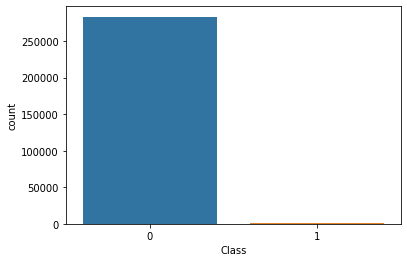

In [10]:
ax = sns.countplot(x='Class', data=df);


In [11]:
df["Class"].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [12]:
# We have a problem here, as here the dataset is imbalance as we have 283253 cases of not fraudalent and only 473 cases of fradulent.As we can see, the percentage of fraudulent operations is lower than that of non-fraudulent ones. This could mean an overfitting problem for our model. We can use several techniques to prevent this:

# Resampling --> For cases where the system is unbalanced like this

# Undersampling --> Remove cases of the majority type

# Oversampling --> Synthetically replicate minority cases
# SMOTE --> A combination technique of the previous two
# In this case, to test our models, we will use the undersampling technique.
number_records_fraud = len (df[df.Class==1])

In [13]:
number_records_fraud

473

In [14]:
# And let's extract the index where the cases of fraud and those of non-fraud are situated
fraud_indices = np.array (df[df.Class==1].index)
normal_indices = np.array (df[df.Class==0].index)

In [15]:
len(normal_indices)

283253

In [16]:
# Randomly obtain a number of non-fraud indices, equal to the fraud one
random_normal_indices = np.random.choice (normal_indices, number_records_fraud, replace = False )

In [17]:
len(random_normal_indices)

473

In [18]:
# Join in a single array the fraud indices with the randomly chosen non-fraud ones
under_sample_indices = np.concatenate ([fraud_indices, random_normal_indices])

In [19]:
under_sample_indices

array([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
         6338,   6427,   6446,   6472,   6529,   6609,   6641,   6717,
         6719,   6734,   6774,   6820,   6870,   6882,   6899,   6903,
         6971,   8296,   8312,   8335,   8615,   8617,   8842,   8845,
         8972,   9035,   9179,   9252,   9487,   9509,  10204,  10484,
        10497,  10498,  10568,  10630,  10690,  10801,  10891,  10897,
        11343,  11710,  11841,  11880,  12070,  12108,  12261,  12369,
        14104,  14170,  14197,  14211,  14338,  15166,  15204,  15225,
        15451,  15476,  15506,  15539,  15566,  15736,  15751,  15781,
        15810,  16415,  16780,  16863,  17317,  17366,  17407,  17453,
        17480,  18466,  18472,  18773,  18809,  20198,  23308,  23422,
        26802,  27362,  27627,  27738,  27749,  29687,  30100,  30314,
        30384,  30398,  30442,  30473,  30496,  31002,  33276,  39183,
        40085,  40525,  41395,  41569,  41943,  42007,  42009,  42473,
      

In [45]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0,-0.350252
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0,-0.254325
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0,-0.082239
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,0,-0.313391


In [43]:
# Now choose the values ​​of these indices
under_sample_data = df1.iloc[under_sample_indices,:]

In [22]:
# Scale the amount variable
from sklearn.preprocessing import StandardScaler
under_sample_data['normAmount'] = StandardScaler().fit_transform(under_sample_data['Amount'].values.reshape (-1,1))
under_sample_data1 = under_sample_data.drop (['Time', 'Amount'], axis = 1);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
under_sample_data1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.450930
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,1.900933
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,0.615767
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,-0.188624
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.446484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124643,1.284635,0.188098,0.347870,0.544000,-0.370219,-0.804944,0.005798,-0.141903,0.178369,-0.044173,...,-0.289154,-0.869363,0.100627,0.000328,0.240912,0.119214,-0.034259,0.013874,0,-0.442127
222018,-0.214382,1.000188,-0.979441,-0.837626,0.591280,-0.956664,0.723143,0.196885,0.006171,-0.495531,...,0.439608,1.430751,-0.261919,-0.626949,-0.618909,0.852524,0.296600,0.230731,0,-0.441282
126284,1.180369,-0.426316,1.008023,-0.693318,-1.228977,-0.553871,-0.679074,0.114353,1.874925,-1.108997,...,0.030659,0.345645,0.040428,0.409812,0.366107,-0.675318,0.107123,0.034059,0,-0.446484
188582,-2.062144,0.747975,-0.401224,-0.773981,0.190979,1.059709,-0.689155,1.716505,0.012654,-1.522203,...,-0.115284,-0.545941,0.621673,-0.393163,-1.179831,-0.297193,-0.283982,-0.220713,0,-0.425589


In [24]:
under_sample_data2 = under_sample_data1.copy()


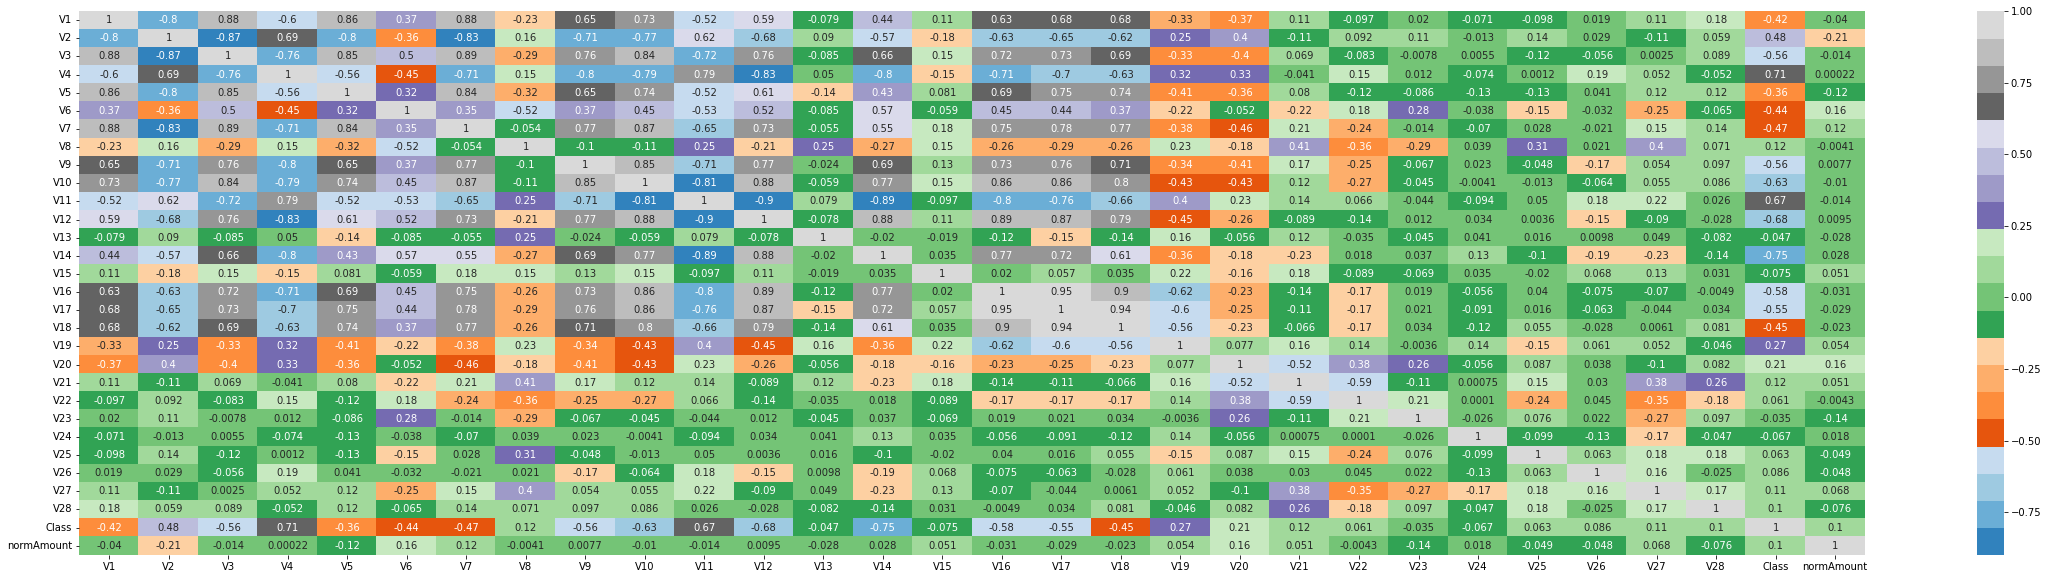

In [25]:
plt.figure(figsize = (40,10))
plot = sns.heatmap(under_sample_data1.corr(), annot = True, cmap='tab20c')
plt.savefig('output.png')
plt.show()

In [26]:
under_sample_data1.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
V1,1.000000,-0.798971,0.875455,-0.600015,0.858958,0.368257,0.877226,-0.225015,0.650888,0.728028,...,0.112597,-0.096744,0.020204,-0.070685,-0.097661,0.019496,0.107215,0.177245,-0.420151,-0.040190
V2,-0.798971,1.000000,-0.866775,0.686582,-0.802939,-0.358668,-0.831487,0.156143,-0.714130,-0.767342,...,-0.108115,0.091519,0.114828,-0.012842,0.140309,0.029431,-0.108767,0.059331,0.477711,-0.211918
V3,0.875455,-0.866775,1.000000,-0.761425,0.845928,0.503946,0.887875,-0.288697,0.755842,0.844088,...,0.069165,-0.083315,-0.007791,0.005516,-0.123766,-0.056187,0.002476,0.088604,-0.561989,-0.014239
V4,-0.600015,0.686582,-0.761425,1.000000,-0.562147,-0.453537,-0.713291,0.146912,-0.801159,-0.786959,...,-0.041441,0.148180,0.012457,-0.073517,0.001178,0.187995,0.051545,-0.051702,0.705935,0.000225
V5,0.858958,-0.802939,0.845928,-0.562147,1.000000,0.318334,0.840868,-0.317578,0.654988,0.742348,...,0.080213,-0.123851,-0.086166,-0.131922,-0.134807,0.040593,0.115302,0.116047,-0.363469,-0.118817
V6,0.368257,-0.358668,0.503946,-0.453537,0.318334,1.000000,0.348067,-0.523448,0.371577,0.450284,...,-0.224081,0.177161,0.276052,-0.038231,-0.153745,-0.032416,-0.250346,-0.065277,-0.436451,0.163436
V7,0.877226,-0.831487,0.887875,-0.713291,0.840868,0.348067,1.000000,-0.054146,0.773947,0.868491,...,0.210257,-0.239621,-0.014342,-0.069713,0.028071,-0.021462,0.148989,0.141390,-0.466677,0.117004
V8,-0.225015,0.156143,-0.288697,0.146912,-0.317578,-0.523448,-0.054146,1.000000,-0.100169,-0.105206,...,0.406717,-0.356090,-0.294499,0.039389,0.306957,0.021188,0.400296,0.070958,0.117265,-0.004066
V9,0.650888,-0.714130,0.755842,-0.801159,0.654988,0.371577,0.773947,-0.100169,1.000000,0.846178,...,0.169112,-0.249538,-0.066755,0.023166,-0.048372,-0.174228,0.053709,0.097242,-0.557516,0.007662
V10,0.728028,-0.767342,0.844088,-0.786959,0.742348,0.450284,0.868491,-0.105206,0.846178,1.000000,...,0.118470,-0.265154,-0.045201,-0.004087,-0.012862,-0.064060,0.055115,0.085500,-0.628320,-0.010391


In [30]:
# From the Cor-relation table these pairs(V1,V3),(V2,V7),(V10,V9),(V5,V7) have multicollinearity and corelation of V26 and V24 with class is below 5 percent. So I droped that column.
under_sample_data3 =under_sample_data1.drop(['V26', 'V24', 'V1', 'V5',"V2",'V9'], axis = 1)

In [31]:
under_sample_data3

,V3,V4,V6,V7,V8,V10,V11,V12,V13,V14,...,V19,V20,V21,V22,V23,V25,V27,V28,Class,normAmount
541,-1.609851,3.997906,-1.426545,-2.537387,1.391657,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,...,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.044519,0.261145,-0.143276,1,-0.450930
623,1.088463,2.288644,-1.064823,0.325574,-0.067794,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,...,0.283345,2.102339,0.661696,0.435477,1.375966,0.279798,-0.252773,0.035764,1,1.900933
4920,-0.359745,2.330243,-0.075788,0.562320,-0.399147,-1.525412,2.032912,-6.560124,0.022937,-1.470102,...,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.156114,0.039566,-0.153029,1,0.615767
6108,-2.592844,2.679787,-1.706536,-3.496197,-0.248778,-4.801637,4.895844,-10.912819,0.184372,-6.771097,...,0.308334,-0.171608,0.573574,0.176968,-0.436207,0.252405,-0.827136,0.849573,1,-0.188624
6329,-4.304597,4.732795,-1.357746,1.713445,-0.496358,-2.447469,2.101344,-4.609628,1.464378,-6.079337,...,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,1.488901,-0.010016,0.146793,1,-0.446484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124643,0.347870,0.544000,-0.804944,0.005798,-0.141903,-0.044173,-0.658928,-0.131096,-0.340599,0.360835,...,0.020957,-0.127304,-0.289154,-0.869363,0.100627,0.240912,-0.034259,0.013874,0,-0.442127
222018,-0.979441,-0.837626,-0.956664,0.723143,0.196885,-0.495531,-2.180957,-0.690036,-0.892683,0.680371,...,-0.074598,-0.224311,0.439608,1.430751,-0.261919,-0.618909,0.296600,0.230731,0,-0.441282
126284,1.008023,-0.693318,-0.553871,-0.679074,0.114353,-1.108997,-0.015398,0.654347,-0.643480,0.003704,...,0.078385,-0.201736,0.030659,0.345645,0.040428,0.366107,0.107123,0.034059,0,-0.446484
188582,-0.401224,-0.773981,1.059709,-0.689155,1.716505,-1.522203,-1.158851,0.669229,-0.367624,0.804367,...,-1.618750,-0.812726,-0.115284,-0.545941,0.621673,-1.179831,-0.283982,-0.220713,0,-0.425589


In [32]:
# Separate the X from the y again
X = under_sample_data3.drop(["Class"],axis=1)
Y = under_sample_data3["Class"]

In [33]:
# Separate the data using the undersampled variables so that the machine does not overestimate any dat
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=5)

In [34]:
# Modelling using Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [35]:
# Here, model accuracy is good.
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9473684210526315


In [36]:
logreg.score(x_test,y_test)

0.9473684210526315

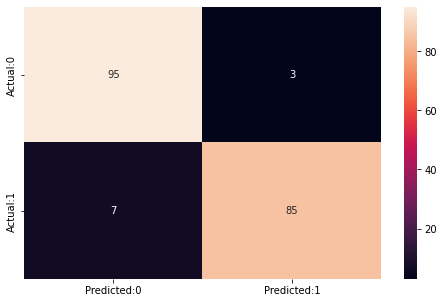

In [37]:
# Confusion Matrix Insight
# This confusion matrix show a total of 56584+67=56651 cases of Not-Fradulant, and 33+62=95 Fradulant cases, out of which 62 were predicted correctly but we also incorrectly predicted 67 cases as Fradulant, which is not a big problem here, the real problem thoses 33 cases which were Fradulant but we predicted them as not fradulant, we can ignore this, in here bank can accomodate Type-1 Error (67 cases) but not that Type-2 Error (33 cases).

# So we are going to reduce Type-2 Error at the cost of Type-1 Error.
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=('Predicted:0', 'Predicted:1'),index = ['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d')

In [38]:
TN = cm[0,0]
TP = cm[1,1]
FN = cm[1,0]
FP = cm[0,1]
sensitivity = TP/float(TP+FN)
specificity = TN/float(TN+FP)


In [39]:
# Statistical Analysis on Model
print('The accuracy of the model = TP+TN/(TP+TN+FP+FN) =                ',(TP+TN)/float(TP+TN+FP+FN), '\n',

'The Missclassification = 1-Accuracy =                           ',1-((TP+TN)/float(TP+TN+FP+FN)), '\n',

'Sensitivity on True Positive Rate = TP/(TP+FN) =                ',TP/float(TP+FN), '\n',

'Specificity or True Negative Rate = TN/(TN+FP)                  ', TP/float(TP+FP), '\n',

'Positive Prediction value = TP/(TP+FP) =                        ', TP/float(TP+FP), '\n',

'Negative prediction value = TN/(TN+FN) =                        ', TN/float(TN+FN), '\n',
 
'Positive likelihood Ration = Sensitivity/(1-Specificity) =      ',sensitivity/(1-specificity), '\n'

'Negative likelihood Ratio = (1-Sensitivity)/Specificity   =      ',(1-sensitivity)/specificity)

The accuracy of the model = TP+TN/(TP+TN+FP+FN) =                 0.9473684210526315 
 The Missclassification = 1-Accuracy =                            0.052631578947368474 
 Sensitivity on True Positive Rate = TP/(TP+FN) =                 0.9239130434782609 
 Specificity or True Negative Rate = TN/(TN+FP)                   0.9659090909090909 
 Positive Prediction value = TP/(TP+FP) =                         0.9659090909090909 
 Negative prediction value = TN/(TN+FN) =                         0.9313725490196079 
 Positive likelihood Ration = Sensitivity/(1-Specificity) =       30.18115942028982 
Negative likelihood Ratio = (1-Sensitivity)/Specificity   =       0.07848970251716247


In [40]:
# From the above statistics we can say that our model is highly specific, bot sensitive.
# Note
# High Sensitivity
# Which means it can predict the Fradulant case more accurately.

# High Specificity
# Which means it can predict the Not-Fradulant case more accurately.
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of Not Fraud (0)', 'Prob of Fraud (1)'])
y_pred_prob_df.head()

,Prob of Not Fraud (0),Prob of Fraud (1)
0,0.232417,0.767583
1,0.943469,0.056531
2,0.961085,0.038915
3,0.955300,0.044700
4,0.618714,0.381286


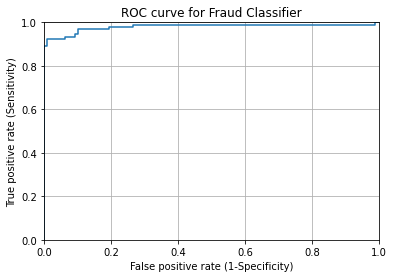

In [42]:
y_pred_prob_yes=logreg.predict_proba(x_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Fraud Classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)